# 3. Advanced Data Analytics

In [151]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from collections import Counter
import matplotlib.pyplot as plt

import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model        # Version 2.14.0.

# 3.1. EDA
## 3.1.1. Data Cleaning

In [2]:
df = pd.read_csv('C:/Users/jose/Downloads/ProjectTweets.csv').reset_index(drop=True)

In [3]:
df

0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0              1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1              2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2              3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3              4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4              5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
1599994  1599995  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  1599996  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  1599997  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  1599998  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  1599999  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karoli   
4               joy_wolf   
...                  ...   
1599994  AmandaMarie1028   
1599995      TheWDBoards   
1599996           bpbabe   
1599997     tinydiamondz   
1599998   RyanTrevMorris   

        @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0        is upset that he can't update his Facebook by ...                                                                   
1        @Kenichan I dived many times for the ball. Man...                                                                   
2          my whole body feels itchy and like its on fire                                                                    
3        @nationwideclass no, it's not behaving at all....                                                                   
4                            @Kwesidei not the whole crew                                                                    
...                                                    ...                                                                   
1599994  Just woke up. Having no school is the best fee...                                                                   
1599995  TheWDB.com - Very cool to hear old Walt interv...                                                                   
1599996  Are you ready for your MoJo Makeover? Ask me f...                                                                   
1599997  Happy 38th Birthday to my boo of alll time!!! ...                                                                   
1599998  happy #charitytuesday @theNSPCC @SparksCharity...                                                                   

[1599999 rows x 6 columns]

In [4]:
# Naming new headers
headers = ['ids','tweet_id' ,'date', 'flag', 'user', 'tweet']

# Assigning them
df.columns = headers

# Display df
df.head()

ids    tweet_id                          date      flag           user  \
0    1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1    2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2    3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3    4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4    5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                               tweet  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   ids       1599999 non-null  int64 
 1   tweet_id  1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   flag      1599999 non-null  object
 4   user      1599999 non-null  object
 5   tweet     1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## Checking if `ids` are unique:

In [6]:
# Checking if all values in the 'tweet_id' column are unique
are_unique = df['tweet_id'].is_unique

are_unique

False

In [7]:
# Finding duplicate 'tweet_id' entries
duplicates = df[df.duplicated('tweet_id', keep=False)].sort_values('tweet_id')
# Set display options
pd.set_option('display.max_rows', None)  # Showing all rows
duplicates


ids    tweet_id                          date      flag  \
212          213  1467863684  Mon Apr 06 22:33:35 PDT 2009  NO_QUERY   
800260    800261  1467863684  Mon Apr 06 22:33:35 PDT 2009  NO_QUERY   
274          275  1467880442  Mon Apr 06 22:38:04 PDT 2009  NO_QUERY   
800299    800300  1467880442  Mon Apr 06 22:38:04 PDT 2009  NO_QUERY   
988          989  1468053611  Mon Apr 06 23:28:09 PDT 2009  NO_QUERY   
801279    801280  1468053611  Mon Apr 06 23:28:09 PDT 2009  NO_QUERY   
1176        1177  1468100580  Mon Apr 06 23:42:57 PDT 2009  NO_QUERY   
801572    801573  1468100580  Mon Apr 06 23:42:57 PDT 2009  NO_QUERY   
1253        1254  1468115720  Mon Apr 06 23:48:00 PDT 2009  NO_QUERY   
801649    801650  1468115720  Mon Apr 06 23:48:00 PDT 2009  NO_QUERY   
1332        1333  1468131748  Mon Apr 06 23:53:22 PDT 2009  NO_QUERY   
801793    801794  1468131748  Mon Apr 06 23:53:22 PDT 2009  NO_QUERY   
1476        1477  1468161883  Tue Apr 07 00:03:10 PDT 2009  NO_QUERY   
801960    801961  1468161883  Tue Apr 07 00:03:10 PDT 2009  NO_QUERY   
802396    802397  1468224250  Tue Apr 07 00:23:49 PDT 2009  NO_QUERY   
1751        1752  1468224250  Tue Apr 07 00:23:49 PDT 2009  NO_QUERY   
802974    802975  1468310350  Tue Apr 07 00:53:48 PDT 2009  NO_QUERY   
2126        2127  1468310350  Tue Apr 07 00:53:48 PDT 2009  NO_QUERY   
803175    803176  1468338634  Tue Apr 07 01:03:49 PDT 2009  NO_QUERY   
2251        2252  1468338634  Tue Apr 07 01:03:49 PDT 2009  NO_QUERY   
803300    803301  1468363676  Tue Apr 07 01:12:56 PDT 2009  NO_QUERY   
2374        2375  1468363676  Tue Apr 07 01:12:56 PDT 2009  NO_QUERY   
3028        3029  1468502040  Tue Apr 07 02:03:41 PDT 2009  NO_QUERY   
804315    804316  1468502040  Tue Apr 07 02:03:41 PDT 2009  NO_QUERY   
3038        3039  1468503801  Tue Apr 07 02:04:18 PDT 2009  NO_QUERY   
804348    804349  1468503801  Tue Apr 07 02:04:18 PDT 2009  NO_QUERY   
3211        3212  1468544973  Tue Apr 07 02:19:32 PDT 2009  NO_QUERY   
804655    804656  1468544973  Tue Apr 07 02:19:32 PDT 2009  NO_QUERY   
3399        3400  1468586841  Tue Apr 07 02:34:25 PDT 2009  NO_QUERY   
804928    804929  1468586841  Tue Apr 07 02:34:25 PDT 2009  NO_QUERY   
805254    805255  1468639063  Tue Apr 07 02:53:24 PDT 2009  NO_QUERY   
3631        3632  1468639063  Tue Apr 07 02:53:24 PDT 2009  NO_QUERY   
3697        3698  1468652839  Tue Apr 07 02:58:23 PDT 2009  NO_QUERY   
805340    805341  1468652839  Tue Apr 07 02:58:23 PDT 2009  NO_QUERY   
805805    805806  1468714181  Tue Apr 07 03:19:34 PDT 2009  NO_QUERY   
3970        3971  1468714181  Tue Apr 07 03:19:34 PDT 2009  NO_QUERY   
4170        4171  1468758512  Tue Apr 07 03:34:37 PDT 2009  NO_QUERY   
806090    806091  1468758512  Tue Apr 07 03:34:37 PDT 2009  NO_QUERY   
806506    806507  1468833927  Tue Apr 07 03:58:41 PDT 2009  NO_QUERY   
4479        4480  1468833927  Tue Apr 07 03:58:41 PDT 2009  NO_QUERY   
5115        5116  1468992236  Tue Apr 07 04:44:49 PDT 2009  NO_QUERY   
807441    807442  1468992236  Tue Apr 07 04:44:49 PDT 2009  NO_QUERY   
5184        5185  1469011145  Tue Apr 07 04:49:48 PDT 2009  NO_QUERY   
807542    807543  1469011145  Tue Apr 07 04:49:48 PDT 2009  NO_QUERY   
6024        6025  1469267615  Tue Apr 07 05:49:29 PDT 2009  NO_QUERY   
808644    808645  1469267615  Tue Apr 07 05:49:29 PDT 2009  NO_QUERY   
809638    809639  1469531660  Tue Apr 07 06:39:53 PDT 2009  NO_QUERY   
6729        6730  1469531660  Tue Apr 07 06:39:53 PDT 2009  NO_QUERY   
809948    809949  1469618724  Tue Apr 07 06:55:21 PDT 2009  NO_QUERY   
6946        6947  1469618724  Tue Apr 07 06:55:21 PDT 2009  NO_QUERY   
810194    810195  1469702025  Tue Apr 07 07:10:03 PDT 2009  NO_QUERY   
7164        7165  1469702025  Tue Apr 07 07:10:03 PDT 2009  NO_QUERY   
7956        7957  1470013783  Tue Apr 07 08:05:26 PDT 2009  NO_QUERY   
811251    811252  1470013783  Tue Apr 07 08:05:26 PDT 2009  NO_QUERY   
811257    811258  1470014082  Tue Apr 07 08:05:29 PDT

In [8]:
 # Reseting display.max_rows as it prevents priting df
pd.reset_option('display.max_rows')

### Number of tweets containing duplicates and number of unique rows:

In [9]:
tweet_id_entries_with_duplicates = len(df['tweet_id'])
tweet_id_entries_with_duplicates

1599999

In [10]:
# dropping duplicates for tweet_id:
df = df.drop_duplicates(subset='tweet_id', keep='first')
tweet_id_entries_no_duplicates = len(df['tweet_id'])
tweet_id_entries_no_duplicates

1598314

In [11]:
Total_tweets_dropped = tweet_id_entries_with_duplicates - tweet_id_entries_no_duplicates
Total_tweets_dropped

1685

In [12]:
# Check if all values in the 'tweet_id' column are unique
are_unique = df['tweet_id'].is_unique

are_unique

True

In [13]:
df

ids    tweet_id                          date      flag  \
0              1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1              2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2              3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3              4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4              5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...          ...         ...                           ...       ...   
1599994  1599995  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  1599996  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  1599997  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  1599998  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  1599999  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                              tweet  
0          scotthamilton  is upset that he can't update his Facebook by ...  
1               mattycus  @Kenichan I dived many times for the ball. Man...  
2                ElleCTF    my whole body feels itchy and like its on fire   
3                 Karoli  @nationwideclass no, it's not behaving at all....  
4               joy_wolf                      @Kwesidei not the whole crew   
...                  ...                                                ...  
1599994  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599995      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599996           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599997     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599998   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1598314 rows x 6 columns]

### Getting the dataset time range:

In [14]:
# Converting 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
# Calculating the time difference
time_difference = df['date'].iloc[-1] - df['date'].iloc[0]

# Print the result
print('First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50')

# Print the result
print('Total time difference:',time_difference)

C:\Users\jose\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50
Total time difference: 70 days 10:21:01


C:\Users\jose\AppData\Local\Temp\ipykernel_15456\2870118220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [15]:
df

ids    tweet_id                date      flag             user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY    scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY         mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY          ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY           Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY         joy_wolf   
...          ...         ...                 ...       ...              ...   
1599994  1599995  2193601966 2009-06-16 08:40:49  NO_QUERY  AmandaMarie1028   
1599995  1599996  2193601969 2009-06-16 08:40:49  NO_QUERY      TheWDBoards   
1599996  1599997  2193601991 2009-06-16 08:40:49  NO_QUERY           bpbabe   
1599997  1599998  2193602064 2009-06-16 08:40:49  NO_QUERY     tinydiamondz   
1599998  1599999  2193602129 2009-06-16 08:40:50  NO_QUERY   RyanTrevMorris   

                                                     tweet  
0        is upset that he can't update his Facebook by ...  
1        @Kenichan I dived many times for the ball. Man...  
2          my whole body feels itchy and like its on fire   
3        @nationwideclass no, it's not behaving at all....  
4                            @Kwesidei not the whole crew   
...                                                    ...  
1599994  Just woke up. Having no school is the best fee...  
1599995  TheWDB.com - Very cool to hear old Walt interv...  
1599996  Are you ready for your MoJo Makeover? Ask me f...  
1599997  Happy 38th Birthday to my boo of alll time!!! ...  
1599998  happy #charitytuesday @theNSPCC @SparksCharity...  

[1598314 rows x 6 columns]

In [16]:
# Calculating distinct days (Year-Month-day)
distinct_dates = df['date'].dt.date.unique()  # Extracting unique dates

dd = pd.DataFrame(distinct_dates, columns=['Distinct_Date'])
dd

Distinct_Date
0     2009-04-06
1     2009-04-07
2     2009-04-17
3     2009-04-18
4     2009-04-19
5     2009-04-20
6     2009-04-21
7     2009-05-01
8     2009-05-02
9     2009-05-03
10    2009-05-04
11    2009-05-09
12    2009-05-10
13    2009-05-11
14    2009-05-13
15    2009-05-14
16    2009-05-16
17    2009-05-17
18    2009-05-18
19    2009-05-21
20    2009-05-22
21    2009-05-23
22    2009-05-25
23    2009-05-26
24    2009-05-27
25    2009-05-28
26    2009-05-29
27    2009-05-30
28    2009-05-31
29    2009-06-01
30    2009-06-02
31    2009-06-03
32    2009-06-04
33    2009-06-05
34    2009-06-06
35    2009-06-07
36    2009-06-14
37    2009-06-15
38    2009-06-16
39    2009-06-17
40    2009-06-18
41    2009-06-19
42    2009-06-20
43    2009-06-21
44    2009-06-22
45    2009-06-23
46    2009-06-24
47    2009-06-25

## Calculating missing dates.
These will be important to handle missing dates when perfoming the time series analysis

In [17]:
dd['Distinct_Date'] = pd.to_datetime(dd['Distinct_Date'])

# Generate a full range of dates
start_date = dd['Distinct_Date'].min()
end_date = dd['Distinct_Date'].max()
all_dates = pd.date_range(start=start_date, end=end_date)

# Convert date range to DataFrame
all_dates_df = pd.DataFrame(all_dates, columns=['Date'])

# Find missing dates by filtering out those that are in the original DataFrame
missing_dates = all_dates_df[~all_dates_df['Date'].isin(dd['Distinct_Date'])]

# Show the DataFrame of missing dates
md = missing_dates.reset_index(drop=True)
md

Date
0  2009-04-08
1  2009-04-09
2  2009-04-10
3  2009-04-11
4  2009-04-12
5  2009-04-13
6  2009-04-14
7  2009-04-15
8  2009-04-16
9  2009-04-22
10 2009-04-23
11 2009-04-24
12 2009-04-25
13 2009-04-26
14 2009-04-27
15 2009-04-28
16 2009-04-29
17 2009-04-30
18 2009-05-05
19 2009-05-06
20 2009-05-07
21 2009-05-08
22 2009-05-12
23 2009-05-15
24 2009-05-19
25 2009-05-20
26 2009-05-24
27 2009-06-08
28 2009-06-09
29 2009-06-10
30 2009-06-11
31 2009-06-12
32 2009-06-13

### This is not correct the last day of the sequence is not the 16th of June is the 25th, reordering the dataset based on date:

In [18]:
# Sorting the df by the 'date' column
df = df.sort_values(by='date')

# Extracting just the date part from the datetime
df['just_date'] = df['date'].dt.date

In [19]:
df

ids    tweet_id                date      flag           user  \
0            1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1            2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2            3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3            4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4            5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...        ...         ...                 ...       ...            ...   
799993  799994  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
799995  799996  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
799997  799998  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
799996  799997  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
799998  799999  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

                                                    tweet   just_date  
0       is upset that he can't update his Facebook by ...  2009-04-06  
1       @Kenichan I dived many times for the ball. Man...  2009-04-06  
2         my whole body feels itchy and like its on fire   2009-04-06  
3       @nationwideclass no, it's not behaving at all....  2009-04-06  
4                           @Kwesidei not the whole crew   2009-04-06  
...                                                   ...         ...  
799993  Tried to get the mutant Fawkes to follow me bu...  2009-06-25  
799995                                    Gmail is down?   2009-06-25  
799997  @Eric_Urbane Sounds like a rival is flagging y...  2009-06-25  
799996                      rest in peace Farrah! So sad   2009-06-25  
799998  has to resit exams over summer...  wishes he w...  2009-06-25  

[1598314 rows x 7 columns]

We can see that index are out of sequence.

In [20]:
# Reset the index and drop the old one
df = df.reset_index(drop=True)
# Resetting the 'ids' column to have a sequential count starting from 1
df['ids'] = range(1, len(df) + 1)

In [21]:
df

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

                                                     tweet   just_date  
0        is upset that he can't update his Facebook by ...  2009-04-06  
1        @Kenichan I dived many times for the ball. Man...  2009-04-06  
2          my whole body feels itchy and like its on fire   2009-04-06  
3        @nationwideclass no, it's not behaving at all....  2009-04-06  
4                            @Kwesidei not the whole crew   2009-04-06  
...                                                    ...         ...  
1598309  Tried to get the mutant Fawkes to follow me bu...  2009-06-25  
1598310                                    Gmail is down?   2009-06-25  
1598311  @Eric_Urbane Sounds like a rival is flagging y...  2009-06-25  
1598312                      rest in peace Farrah! So sad   2009-06-25  
1598313  has to resit exams over summer...  wishes he w...  2009-06-25  

[1598314 rows x 7 columns]

In [22]:
# Creating a backup, to bring back @ and # for text sentiment analysis
dfbsa = df.copy()

In [23]:
#df = df1.copy()

Index is in sequence now.

## Plotting the number of tweets per day

In [24]:
# Grouping by date and count tweets
tweet_counts = df.groupby('just_date').size()
tweet_counts

just_date
2009-04-06      3353
2009-04-07     17289
2009-04-17      3083
2009-04-18     21732
2009-04-19     27433
2009-04-20     18433
2009-04-21      8579
2009-05-01      7708
2009-05-02     27402
2009-05-03     35288
2009-05-04     15457
2009-05-09     11732
2009-05-10     25984
2009-05-11      4184
2009-05-13      4063
2009-05-14     17431
2009-05-16      9135
2009-05-17     40106
2009-05-18     36415
2009-05-21      2128
2009-05-22     39018
2009-05-23       169
2009-05-25       169
2009-05-26     10770
2009-05-27       839
2009-05-28     15885
2009-05-29     73755
2009-05-30    103554
2009-05-31     94432
2009-06-01    110148
2009-06-02     64115
2009-06-03     41532
2009-06-04      7835
2009-06-05     58705
2009-06-06    111513
2009-06-07     96233
2009-06-14      8261
2009-06-15    109654
2009-06-16     67912
2009-06-17     44012
2009-06-18     43004
2009-06-19     43136
2009-06-20     45364
2009-06-21     16360
2009-06-22     12009
2009-06-23     17002
2009-06-24      6299
200

## 3.1.2. Unbalanced Dataset

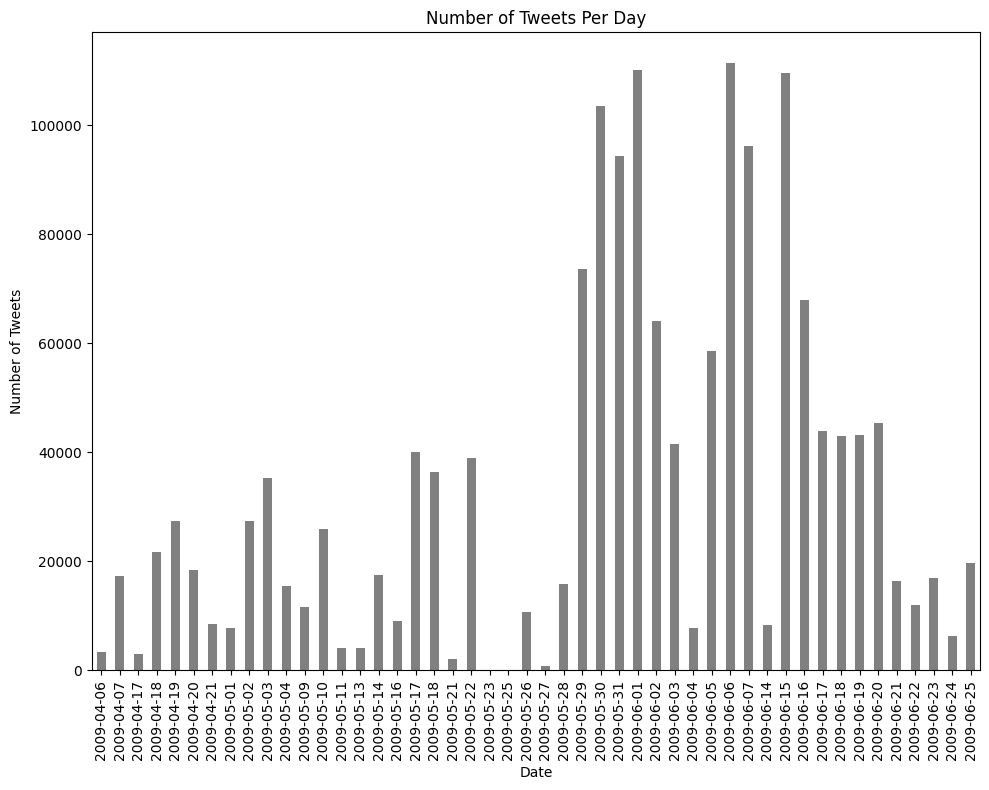

In [25]:
# Setting the figure size as per Tufte's style, minimal distraction
plt.figure(figsize=(10, 8))

# Plotting
tweet_counts.plot(kind='bar', color='gray')

# Customizing the plot to be clear and minimalistic
plt.title('Number of Tweets Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)  # Rotating labels to 90 degrees for better readability
plt.tight_layout()  # Adjusting layout to not cut off labels
# Display the plot
plt.show()

Dataset is clearly unbalanced.

## 3.1.3. Sentiment Analysis Strategy

### Sentiment Analysis
After utilizing `TextBlob` and attempting to employ `Roberta` and `BERT`, which required excessive processing time, the chosen method for analyzing tweet sentiment is `VADER`.

In [26]:
nltk.download('stopwords')

# Cleaning function
def clean_tweet(tweet):
    # Removing URLs, mentions, and hashtags
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'#\S+', '', tweet)

    # Remove all non-letters and non-essential spaces
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)

    # Converting to lower case
    tweet = tweet.lower().strip()
    
    # Delete stop words
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)

    # Removing emojis
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)
    
    return tweet

# Applying cleaning function to the tweets with progress indicator
tqdm.pandas()
df['tweet'] = df['tweet'].progress_apply(clean_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/1598314 [00:00<?, ?it/s]

In [27]:
pd.set_option('display.max_colwidth', None)
df['tweet'].head(20)

0     upset cant update facebook texting might cry result school today also blah
1                              dived many times ball managed save rest go bounds
2                                               whole body feels itchy like fire
3                                                       behaving im mad cant see
4                                                                     whole crew
5                                                                       need hug
6                    hey long time see yes rains bit bit lol im fine thanks hows
7                                                                     nope didnt
8                                                                      que muera
9                                                spring break plain city snowing
10                                                                repierced ears
11                               couldnt bear watch thought ua loss embarrassing
12                          

In [28]:
# Reseting display.max_colwidth as it prevents priting df
pd.reset_option('display.max_colwidth')

In [29]:
df

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

                                                     tweet   just_date  
0        upset cant update facebook texting might cry r...  2009-04-06  
1        dived many times ball managed save rest go bounds  2009-04-06  
2                         whole body feels itchy like fire  2009-04-06  
3                                 behaving im mad cant see  2009-04-06  
4                                               whole crew  2009-04-06  
...                                                    ...         ...  
1598309  tried get mutant fawkes follow wouldnt lonely ...  2009-06-25  
1598310                                              gmail  2009-06-25  
1598311         sounds like rival flagging ads much though  2009-06-25  
1598312                              rest peace farrah sad  2009-06-25  
1598313  resit exams summer wishes worked harder first ...  2009-06-25  

[1598314 rows x 7 columns]

In [30]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Defining function to get VADER sentiment scores
def get_vader_score(tweet):
    score = sia.polarity_scores(tweet)
    return score['compound']  # Returns the compound score which is a combined sentiment score

# Tracking progress
tqdm.pandas(desc="Analyzing Sentiments")

# Apply the sentiment analysis function with progress tracking
df['vader_score'] = df['tweet'].progress_apply(get_vader_score)

# Printing the first few entries to verify
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jose\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Analyzing Sentiments:   0%|          | 0/1598314 [00:00<?, ?it/s]

   ids    tweet_id                date      flag           user  \
0    1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1    2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2    3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3    4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4    5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   

                                               tweet   just_date  vader_score  
0  upset cant update facebook texting might cry r...  2009-04-06      -0.7269  
1  dived many times ball managed save rest go bounds  2009-04-06       0.4939  
2                   whole body feels itchy like fire  2009-04-06      -0.2500  
3                           behaving im mad cant see  2009-04-06      -0.4939  
4                                         whole crew  2009-04-06       0.0000  


In [31]:
#df.to_csv('tweets_with_vader_scores.csv', index=False)

In [32]:
#df = pd.read_csv('C:/Users/jose/Downloads/tweets_with_vader_scores.csv').reset_index(drop=True)

In [33]:
df

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

                                                     tweet   just_date  \
0        upset cant update facebook texting might cry r...  2009-04-06   
1        dived many times ball managed save rest go bounds  2009-04-06   
2                         whole body feels itchy like fire  2009-04-06   
3                                 behaving im mad cant see  2009-04-06   
4                                               whole crew  2009-04-06   
...                                                    ...         ...   
1598309  tried get mutant fawkes follow wouldnt lonely ...  2009-06-25   
1598310                                              gmail  2009-06-25   
1598311         sounds like rival flagging ads much though  2009-06-25   
1598312                              rest peace farrah sad  2009-06-25   
1598313  resit exams summer wishes worked harder first ...  2009-06-25   

         vader_score  
0            -0.7269  
1             0.4939  
2            -0.2500  
3            -0.4939  
4             0.0000  
...              ...  
1598309       0.2755  
1598310       0.0000  
1598311       0.3612  
1598312       0.1027  
1598313       0.1531  

[1598314 rows x 8 columns]

In [34]:
# backup
df1 = df.copy()

In [35]:
#df = df1.copy()

## Daily sentiment analysis

In [36]:
# Group by the date and count tweets
sentiment_average = df.groupby('just_date')['vader_score'].mean()

sentiment_average

just_date
2009-04-06    0.148504
2009-04-07    0.168180
2009-04-17    0.203381
2009-04-18    0.182805
2009-04-19    0.188380
2009-04-20    0.180345
2009-04-21    0.181028
2009-05-01    0.179393
2009-05-02    0.182539
2009-05-03    0.174632
2009-05-04    0.170109
2009-05-09    0.184537
2009-05-10    0.213316
2009-05-11    0.166021
2009-05-13    0.147291
2009-05-14    0.173881
2009-05-16    0.173534
2009-05-17    0.201790
2009-05-18    0.190056
2009-05-21    0.175712
2009-05-22    0.199056
2009-05-23    0.204043
2009-05-25    0.189096
2009-05-26    0.174135
2009-05-27    0.135222
2009-05-28    0.186794
2009-05-29    0.185356
2009-05-30    0.192523
2009-05-31    0.193955
2009-06-01    0.175659
2009-06-02    0.177361
2009-06-03    0.174286
2009-06-04    0.160889
2009-06-05    0.185723
2009-06-06    0.183265
2009-06-07    0.183626
2009-06-14    0.173174
2009-06-15    0.170274
2009-06-16    0.094620
2009-06-17   -0.014915
2009-06-18   -0.018142
2009-06-19   -0.013256
2009-06-20   -0.007689
2

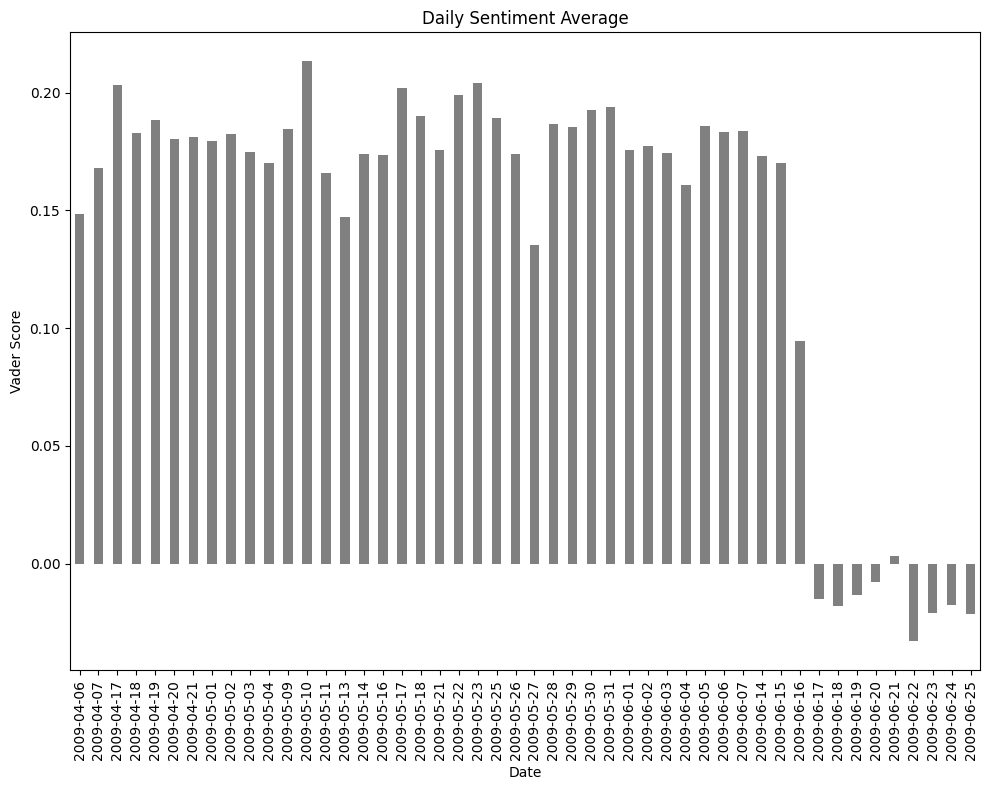

In [37]:
# Setting the figure size as per Tufte's style, minimal distraction
plt.figure(figsize=(10, 8))

# Plotting
sentiment_average.plot(kind='bar', color='gray')

# Customizing the plot to be clear and minimalistic
plt.title('Daily Sentiment Average')
plt.xlabel('Date')
plt.ylabel('Vader Score')
plt.xticks(rotation=90)  # Rotating labels to 90 degrees for better readability
plt.tight_layout()  # Adjusting layout to not cut off labels
# Display the plot
plt.show()

In [38]:
# Adding a new column for the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Converting 'just_date' to datetime format
df['just_date'] = pd.to_datetime(df['just_date'])

# Group by the date and count tweets
sentiment_average_day = df.groupby('just_date')['vader_score'].mean().reset_index()
# Add a new column for the day of the week
sentiment_average_day['day_of_week'] = sentiment_average_day['just_date'].dt.day_name()
sentiment_average_day

just_date  vader_score day_of_week
0  2009-04-06     0.148504      Monday
1  2009-04-07     0.168180     Tuesday
2  2009-04-17     0.203381      Friday
3  2009-04-18     0.182805    Saturday
4  2009-04-19     0.188380      Sunday
5  2009-04-20     0.180345      Monday
6  2009-04-21     0.181028     Tuesday
7  2009-05-01     0.179393      Friday
8  2009-05-02     0.182539    Saturday
9  2009-05-03     0.174632      Sunday
10 2009-05-04     0.170109      Monday
11 2009-05-09     0.184537    Saturday
12 2009-05-10     0.213316      Sunday
13 2009-05-11     0.166021      Monday
14 2009-05-13     0.147291   Wednesday
15 2009-05-14     0.173881    Thursday
16 2009-05-16     0.173534    Saturday
17 2009-05-17     0.201790      Sunday
18 2009-05-18     0.190056      Monday
19 2009-05-21     0.175712    Thursday
20 2009-05-22     0.199056      Friday
21 2009-05-23     0.204043    Saturday
22 2009-05-25     0.189096      Monday
23 2009-05-26     0.174135     Tuesday
24 2009-05-27     0.135222   Wednesday
25 2009-05-28     0.186794    Thursday
26 2009-05-29     0.185356      Friday
27 2009-05-30     0.192523    Saturday
28 2009-05-31     0.193955      Sunday
29 2009-06-01     0.175659      Monday
30 2009-06-02     0.177361     Tuesday
31 2009-06-03     0.174286   Wednesday
32 2009-06-04     0.160889    Thursday
33 2009-06-05     0.185723      Friday
34 2009-06-06     0.183265    Saturday
35 2009-06-07     0.183626      Sunday
36 2009-06-14     0.173174      Sunday
37 2009-06-15     0.170274      Monday
38 2009-06-16     0.094620     Tuesday
39 2009-06-17    -0.014915   Wednesday
40 2009-06-18    -0.018142    Thursday
41 2009-06-19    -0.013256      Friday
42 2009-06-20    -0.007689    Saturday
43 2009-06-21     0.003497      Sunday
44 2009-06-22    -0.032990      Monday
45 2009-06-23    -0.020812     Tuesday
46 2009-06-24    -0.017638   Wednesday
47 2009-06-25    -0.021169    Thursday

## Hourly sentiment analysis

In [39]:
def calculate_hourly_vader_average_with_day(df):
    
    # Group by the hour and calculate the mean
    hourly_average = df.resample('H', on='date')['vader_score'].mean().reset_index()
    
    # Add a column for the day of the week
    hourly_average['day_of_week'] = hourly_average['date'].dt.day_name()
    
    return hourly_average

# Assuming df is your DataFrame
hourly_sentiment_average_with_day = calculate_hourly_vader_average_with_day(df)

# Finding the top 20 highest scores and sorting them by date in descending order
top_20_scores = hourly_sentiment_average_with_day.nlargest(20, 'vader_score').sort_values(by='date', ascending=True)

# Finding the top 20 lowest scores and sorting them by date in descending order
lowest_20_scores = hourly_sentiment_average_with_day.nsmallest(20, 'vader_score').sort_values(by='date', ascending=True)

print("Top 20 Highest Vader Scores:")
print(top_20_scores[['date', 'vader_score', 'day_of_week']])

print("\nTop 20 Lowest Vader Scores:")
print(lowest_20_scores[['date', 'vader_score', 'day_of_week']])


Top 20 Highest Vader Scores:
                    date  vader_score day_of_week
264  2009-04-17 22:00:00     0.230845      Friday
282  2009-04-18 16:00:00     0.220704    Saturday
322  2009-04-20 08:00:00     0.310442      Monday
794  2009-05-10 00:00:00     0.221130      Sunday
798  2009-05-10 04:00:00     0.226547      Sunday
799  2009-05-10 05:00:00     0.231607      Sunday
800  2009-05-10 06:00:00     0.226119      Sunday
801  2009-05-10 07:00:00     0.249583      Sunday
802  2009-05-10 08:00:00     0.221373      Sunday
803  2009-05-10 09:00:00     0.253646      Sunday
899  2009-05-14 09:00:00     0.255039    Thursday
980  2009-05-17 18:00:00     0.296428      Sunday
981  2009-05-17 19:00:00     0.353558      Sunday
983  2009-05-17 21:00:00     0.229467      Sunday
1276 2009-05-30 02:00:00     0.232778    Saturday
1277 2009-05-30 03:00:00     0.221535    Saturday
1278 2009-05-30 04:00:00     0.241518    Saturday
1300 2009-05-31 02:00:00     0.229973      Sunday
1301 2009-05-31 03:00

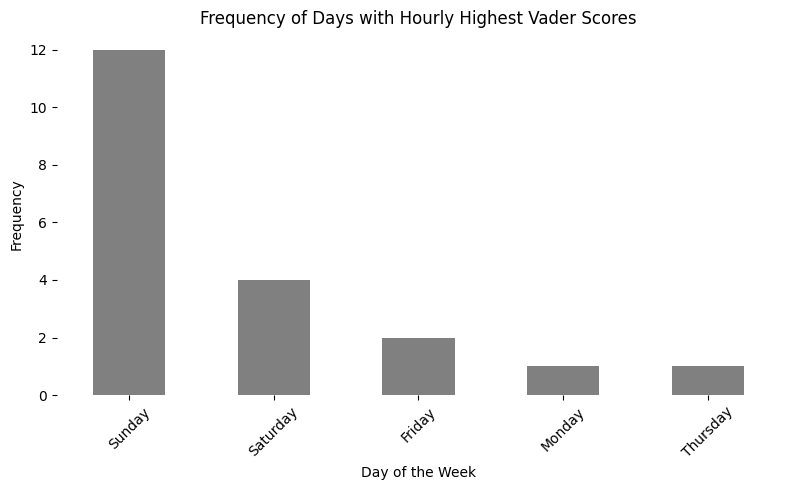

In [40]:
# Count frequency for each day
day_counts = top_20_scores['day_of_week'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))  # Set the size of the figure
day_counts.plot(kind='bar', color='gray')  # Use a plain color for the bars
plt.title('Frequency of Days with Hourly Highest Vader Scores')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(False)  # Remove grid lines for a cleaner look
plt.box(False)  # Remove the box frame
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

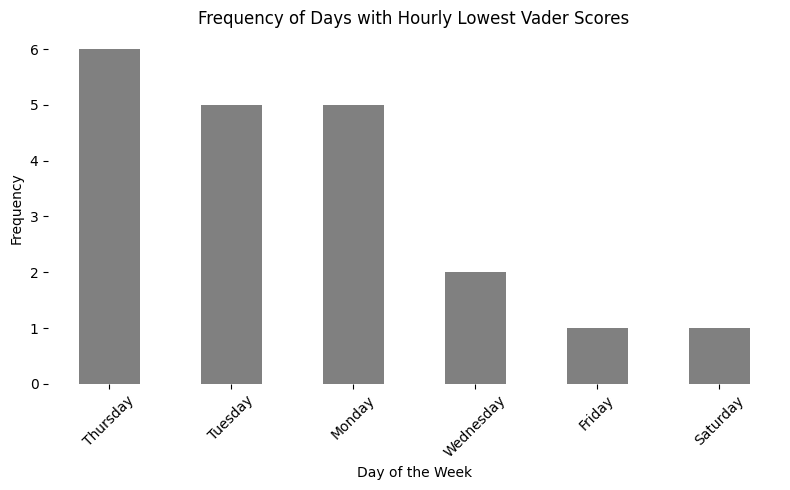

In [41]:
# Count frequency for each day
day_counts = lowest_20_scores['day_of_week'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))  # Set the size of the figure
day_counts.plot(kind='bar', color='gray')  # Use a plain color for the bars
plt.title('Frequency of Days with Hourly Lowest Vader Scores')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(False)  # Remove grid lines for a cleaner look
plt.box(False)  # Remove the box frame
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

### Analyzing tweets for hints to understand what motivates changes in sentiment, focusing particularly on the latter part of the graph where the sentiment is lowest.

In [42]:
# Filter DataFrame for the date range
mask = (df['date'] >= '2009-05-29') & (df['date'] <= '2009-06-14')
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize and filter stopwords
tokens = word_tokenize(all_tweets)
filtered_words = [word for word in tokens if word.isalnum()]  # Remove punctuation/numbers

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in filtered_words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(20)  

# Display the most common words and their counts
print(most_common_words)


[('im', 82707), ('good', 44864), ('get', 37226), ('day', 36984), ('like', 36468), ('love', 34126), ('go', 33220), ('got', 32840), ('going', 30248), ('dont', 29507), ('today', 29105), ('lol', 28435), ('cant', 27624), ('time', 26872), ('u', 26657), ('back', 25748), ('work', 25689), ('one', 24551), ('know', 24360), ('see', 22907)]


In [43]:
# Generate bigrams
bigram_counts = Counter(ngrams(filtered_words, 2))

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(20)
print("Most common bigrams:", most_common_bigrams)

Most common bigrams: [(('gon', 'na'), 11204), (('cant', 'wait'), 7331), (('wan', 'na'), 7255), (('last', 'night'), 5458), (('im', 'going'), 4947), (('good', 'morning'), 4651), (('got', 'ta'), 4125), (('dont', 'know'), 3622), (('im', 'gon'), 2956), (('wish', 'could'), 2656), (('feel', 'like'), 2648), (('looking', 'forward'), 2624), (('im', 'sorry'), 2588), (('good', 'luck'), 2557), (('na', 'go'), 2531), (('dont', 'want'), 2400), (('getting', 'ready'), 2368), (('looks', 'like'), 2279), (('good', 'night'), 2261), (('im', 'sure'), 1999)]


In [44]:
# Generate trigrams
trigram_counts = Counter(ngrams(filtered_words, 3))

# Get the most common trigrams
most_common_trigrams = trigram_counts.most_common(20)
print("Most common trigrams:", most_common_trigrams)

Most common trigrams: [(('im', 'gon', 'na'), 2940), (('wan', 'na', 'go'), 1617), (('mtv', 'movie', 'awards'), 1333), (('cant', 'wait', 'see'), 1261), (('dont', 'wan', 'na'), 1154), (('gon', 'na', 'go'), 913), (('get', 'followers', 'day'), 831), (('followers', 'day', 'using'), 830), (('day', 'using', 'wwwtweeteraddercom'), 830), (('using', 'wwwtweeteraddercom', 'add'), 830), (('wwwtweeteraddercom', 'add', 'everyone'), 830), (('add', 'everyone', 'train'), 830), (('everyone', 'train', 'pay'), 830), (('train', 'pay', 'vip'), 830), (('gon', 'na', 'miss'), 796), (('wan', 'na', 'see'), 679), (('new', 'moon', 'trailer'), 612), (('gon', 'na', 'get'), 545), (('got', 'ta', 'go'), 503), (('cant', 'wait', 'till'), 466)]


In [45]:
# Generate fourgrams
fourgrams_counts = Counter(ngrams(filtered_words, 4))

# Get the most common fourgrams
most_common_fourgrams = fourgrams_counts.most_common(20)
print("Most common fourgrams:", most_common_fourgrams)

Most common fourgrams: [(('get', 'followers', 'day', 'using'), 830), (('followers', 'day', 'using', 'wwwtweeteraddercom'), 830), (('day', 'using', 'wwwtweeteraddercom', 'add'), 830), (('using', 'wwwtweeteraddercom', 'add', 'everyone'), 830), (('wwwtweeteraddercom', 'add', 'everyone', 'train'), 830), (('add', 'everyone', 'train', 'pay'), 830), (('everyone', 'train', 'pay', 'vip'), 830), (('im', 'gon', 'na', 'miss'), 418), (('dont', 'wan', 'na', 'go'), 346), (('think', 'im', 'gon', 'na'), 300), (('im', 'gon', 'na', 'go'), 272), (('lost', 'please', 'help', 'find'), 227), (('please', 'help', 'find', 'good'), 227), (('help', 'find', 'good', 'home'), 227), (('limit', 'story', 'ch', 'tell'), 227), (('story', 'ch', 'tell', 'annoying'), 193), (('ch', 'tell', 'annoying', 'wwwiamsoannoyedcom'), 193), (('wan', 'na', 'go', 'home'), 184), (('wan', 'na', 'go', 'back'), 181), (('watching', 'mtv', 'movie', 'awards'), 167)]


#### By analyzing the tweets, it is difficult to determine what triggers changes in sentiment. Incorporating hashtags and mentions may help identify what motivated these changes.

In [46]:
# backup
#df = df1.copy()

In [47]:
# Getting backup
dfbsa = dfbsa.copy()

# Dropping tweet
df.drop(columns='tweet', inplace=True)

# Renaming column day_of_week
df.rename(columns={'just_date': 'day'}, inplace=True)

# Ensure 'date' is a datetime type
df['day'] = pd.to_datetime(df['day'])

df

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

               day  vader_score day_of_week  
0       2009-04-06      -0.7269      Monday  
1       2009-04-06       0.4939      Monday  
2       2009-04-06      -0.2500      Monday  
3       2009-04-06      -0.4939      Monday  
4       2009-04-06       0.0000      Monday  
...            ...          ...         ...  
1598309 2009-06-25       0.2755    Thursday  
1598310 2009-06-25       0.0000    Thursday  
1598311 2009-06-25       0.3612    Thursday  
1598312 2009-06-25       0.1027    Thursday  
1598313 2009-06-25       0.1531    Thursday  

[1598314 rows x 8 columns]

In [48]:
dfbsa

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

                                                     tweet   just_date  
0        is upset that he can't update his Facebook by ...  2009-04-06  
1        @Kenichan I dived many times for the ball. Man...  2009-04-06  
2          my whole body feels itchy and like its on fire   2009-04-06  
3        @nationwideclass no, it's not behaving at all....  2009-04-06  
4                            @Kwesidei not the whole crew   2009-04-06  
...                                                    ...         ...  
1598309  Tried to get the mutant Fawkes to follow me bu...  2009-06-25  
1598310                                    Gmail is down?   2009-06-25  
1598311  @Eric_Urbane Sounds like a rival is flagging y...  2009-06-25  
1598312                      rest in peace Farrah! So sad   2009-06-25  
1598313  has to resit exams over summer...  wishes he w...  2009-06-25  

[1598314 rows x 7 columns]

In [49]:
# Merging tweet into df to look for # and @

# Perform the merge
df = pd.merge(df, dfbsa[['tweet_id', 'tweet']], on='tweet_id', how='left')

# Now 'df' will have the 'tweet' column added from 'dfbsa' based on matching 'tweet_id'
df

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

               day  vader_score day_of_week  \
0       2009-04-06      -0.7269      Monday   
1       2009-04-06       0.4939      Monday   
2       2009-04-06      -0.2500      Monday   
3       2009-04-06      -0.4939      Monday   
4       2009-04-06       0.0000      Monday   
...            ...          ...         ...   
1598309 2009-06-25       0.2755    Thursday   
1598310 2009-06-25       0.0000    Thursday   
1598311 2009-06-25       0.3612    Thursday   
1598312 2009-06-25       0.1027    Thursday   
1598313 2009-06-25       0.1531    Thursday   

                                                     tweet  
0        is upset that he can't update his Facebook by ...  
1        @Kenichan I dived many times for the ball. Man...  
2          my whole body feels itchy and like its on fire   
3        @nationwideclass no, it's not behaving at all....  
4                            @Kwesidei not the whole crew   
...                                                    ...  
1598309  Tried to get the mutant Fawkes to follow me bu...  
1598310                                    Gmail is down?   
1598311  @Eric_Urbane Sounds like a rival is flagging y...  
1598312                      rest in peace Farrah! So sad   
1598313  has to resit exams over summer...  wishes he w...  

[1598314 rows x 9 columns]

## Neutral sentiment analysis 18/04/2009:

In [50]:
# Downloading nltk resources
nltk.download('punkt')

# Filtering dates:
mask = (df['day'] >= '2009-04-18') & (df['day'] < '2009-04-19') &  (df['vader_score'] <= 0.1)  &  (df['vader_score'] >= -0.1)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jose\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most Common Hashtag Followed Pairs:
[(('#', 'asot400'), 48), (('#', 'ASOT400'), 16), (('#', 'fb'), 5), (('#', 'readathon'), 4), (('#', 'tltsym09'), 2), (('#', 'twitter'), 2), (('#', 'tcot'), 2), (('#', 'web'), 2), (('#', 'notacon'), 2), (('#', 'SUPA'), 2), (('#', '@'), 2), (('#', 'RSD09'), 2), (('#', 'zenjar'), 2), (('#', '3'), 2), (('#', 'squirrel'), 1), (('#', 'Joomla'), 1), (('#', 'forestgarden'), 1), (('#', 'barcampca09'), 1), (('#', 'idiotictwitterapps'), 1), (('#', 'metanoiacafe'), 1), (('#', 'PRSANY'), 1), (('#', '6.'), 1), (('#', 'maximopark'), 1), (('#', '-humor'), 1), (('#', 'Depression'), 1), (('#', 'Therapie'), 1), (('#', 'news'), 1), (('#', 'socialmedia'), 1), (('#', 'business'), 1), (('#', 'text'), 1), (('#', 'follow'), 1), (('#', 'tweet'), 1), (('#', 'barcamporlando'), 1), (('#', 'blockparty'), 1), (('#', 'Phish'), 1), (('#', 'followfriday'), 1), (('#', 'celtic'), 1), (('#', 'coktup'), 1), (('#', 'whuffie'), 1), (('#', 'democratic'), 1), (('#', 'anorak'), 1), (('#', 'lcr

## Neutral sentiment analysis 03/05/2009:

In [51]:
# Filtering dates:
mask = (df['day'] >= '2009-05-03') & (df['day'] < '2009-05-04') &  (df['vader_score'] <= 0.1)  &  (df['vader_score'] >= -0.1)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'hoppusday'), 17), (('#', 'fb'), 8), (('#', 'bck5'), 7), (('#', 'IDIOT'), 6), (('#', 'pawpawty'), 5), (('#', 'PhotoFollows'), 4), (('#', 'kelloggs'), 4), (('#', 'p2'), 3), (('#', 'swineflu'), 3), (('#', 'url'), 2), (('#', 'followfriday'), 2), (('#', 'TSCC'), 2), (('#', '2'), 2), (('#', 'Kelloggs'), 2), (('#', 'twtvite'), 2), (('#', 'akljulytweetup'), 2), (('#', '$'), 2), (('#', 'sambradley'), 2), (('#', 'pacman'), 1), (('#', 'of'), 1), (('#', 'iamasimplecaveman'), 1), (('#', 'ampinoy'), 1), (('#', '888'), 1), (('#', '887'), 1), (('#', ')'), 1), (('#', 'kukku'), 1), (('#', ','), 1), (('#', 'shared'), 1), (('#', 'BCK5'), 1), (('#', 'insomnia'), 1), (('#', 'Twitter'), 1), (('#', 'Google'), 1), (('#', 'jonaslive'), 1), (('#', 'Famished'), 1), (('#', 'si'), 1), (('#', 'pughug'), 1), (('#', 'logies'), 1), (('#', 'bck6'), 1), (('#', 'masterchef'), 1), (('#', 'Quartz'), 1), (('#', 'backgroundimage'), 1), (('#', 'delicious'), 1), (('#', 'Library'), 1)

## Neutral sentiment analysis 13/05/2009:

In [52]:
# Filtering dates:
mask = (df['day'] >= '2009-05-13') & (df['day'] < '2009-05-14') &  (df['vader_score'] <= 0.2)  &  (df['vader_score'] >= -0.2)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'fb'), 4), (('#', 'geocaching'), 2), (('#', 'lost'), 1), (('#', 'aftrsmachinima'), 1), (('#', 'IPL'), 1), (('#', 'gae'), 1), (('#', 'groovy'), 1), (('#', 'twitterfail'), 1), (('#', '$'), 1), (('#', 'Lost'), 1), (('#', 'notafraidtobeservicey'), 1), (('#', 'craigslist'), 1), (('#', 'fixreplies'), 1), (('#', 'fail'), 1), (('#', 'StarTrek'), 1), (('#', 'IMAX'), 1), (('#', 'BCITW'), 1), (('#', 'Lostafarian'), 1), (('#', 'Radio4'), 1), (('#', 'dc'), 1), (('#', 'boycottnick'), 1), (('#', '514'), 1)]

Most Common Mention Followed Pairs:
[(('@', 'ddlovato'), 3), (('@', 'DavidArchie'), 3), (('@', 'kspidel'), 3), (('@', 'aileen2u2'), 2), (('@', 'maureenjohnson'), 2), (('@', 'the'), 2), (('@', 'KevinSpacey'), 2), (('@', 'twitter'), 2), (('@', 'TheEllenShow'), 2), (('@', 'HerLadyRavenSky'), 2), (('@', 'shannonpaul'), 2), (('@', 'rissacupcake'), 2), (('@', 'dennisdoomen'), 2), (('@', 'marieannevi'), 2), (('@', 'markhoppus'), 1), (('@', 'dstrokeallday'), 1)

## Neutral sentiment analysis 02/06/2009:

In [53]:
# Filtering dates:
mask = (df['day'] >= '2009-06-02') & (df['day'] < '2009-06-03') &  (df['vader_score'] <= 0.2)  &  (df['vader_score'] >= -0.2)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'mcflyforgermany'), 116), (('#', 'goodsex'), 50), (('#', 'fb'), 21), (('#', 'E3'), 19), (('#', 'Obama'), 13), (('#', 'Egypt'), 13), (('#', '1'), 12), (('#', 'e3'), 12), (('#', 'brazillovesmcfly'), 11), (('#', 'ShaunJumpnow'), 9), (('#', '2'), 8), (('#', 'homepartyger'), 7), (('#', 'fail'), 6), (('#', 'jonasliveonfb'), 6), (('#', 'brazilwillmissmcfly'), 6), (('#', 'jtv'), 5), (('#', 'Goodsex'), 4), (('#', 'bing'), 4), (('#', 'InappropriateMovies'), 4), (('#', 'dhempe'), 4), (('#', 'midnightromeo'), 4), (('#', 'BTUB'), 3), (('#', 'XboxE3'), 3), (('#', 'hosteurope'), 3), (('#', 'Drupal'), 3), (('#', 'fowa'), 3), (('#', 'charitytuesday'), 3), (('#', 'GoodSex'), 3), (('#', '3'), 3), (('#', 'zenjar'), 3), (('#', 'javaone'), 3), (('#', 'cilips09'), 2), (('#', 'btub'), 2), (('#', '&'), 2), (('#', 'Berlin'), 2), (('#', 'Entrepreneurs'), 2), (('#', 'clothdiapers'), 2), (('#', 'smc_mcr'), 2), (('#', 'scrm'), 2), (('#', 'flylady'), 2), (('#', 'iphone'), 

## Neutral sentiment analysis 04/06/2009:

In [54]:
# Filtering dates:
mask = (df['day'] >= '2009-06-04') & (df['day'] < '2009-06-05') &  (df['vader_score'] <= 0.2)  &  (df['vader_score'] >= -0.2)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'alltimelow'), 9), (('#', 'followfriday'), 4), (('#', 'FULLSERVICE'), 3), (('#', 'fb'), 3), (('#', 'fullservice'), 3), (('#', 'crocsfeelgood02'), 3), (('#', "MichaelJackson'sCurls"), 2), (('#', 'FF'), 2), (('#', 'BB'), 1), (('#', 'bing'), 1), (('#', 'google'), 1), (('#', 'babealert'), 1), (('#', 'hunkalert'), 1), (('#', 'badabing'), 1), (('#', 'blsms'), 1), (('#', 'dnd'), 1), (('#', 'ddi'), 1), (('#', 'rpga'), 1), (('#', 'weekend'), 1), (('#', 'crocsfeelgood01'), 1), (('#', 'ches'), 1), (('#', 'NHL'), 1), (('#', 'BaconFest09'), 1), (('#', 'NASCAR'), 1), (('#', 'wsiyh'), 1), (('#', 'ImGuiltyof'), 1), (('#', 'Vistage'), 1), (('#', 'WWDC'), 1), (('#', 'hoppuspleasefollowmcfly'), 1), (('#', 'fail'), 1), (('#', 'plmconx'), 1), (('#', 'SYTYCD'), 1), (('#', 'FullService'), 1), (('#', 'fiestamovement'), 1), (('#', 'spankyou'), 1), (('#', 'LSSO'), 1), (('#', 'acenetc2009'), 1), (('#', 'twithelp'), 1), (('#', 'zenjar'), 1), (('#', 'n97kl'), 1), (('#', 

## Positive sentiment analysis 17/04/2009 to 18/04/2009 (Friday & Saturday):

In [55]:
# Filtering dates:
mask = (df['day'] >= '2009-04-17') & (df['day'] <= '2009-04-18') &  (df['vader_score'] > 0.2)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)


Most Common Hashtag Followed Pairs:
[(('#', 'asot400'), 46), (('#', 'ASOT400'), 20), (('#', 'followfriday'), 18), (('#', 'fb'), 12), (('#', 'readathon'), 12), (('#', '2'), 5), (('#', '1'), 3), (('#', 'f1'), 3), (('#', 'randomfacts'), 2), (('#', 'iloveyou'), 2), (('#', 'satchat'), 2), (('#', 'tcot'), 2), (('#', 'barcamporlando'), 2), (('#', 'webdd'), 2), (('#', 'flylady'), 2), (('#', 'film_club'), 2), (('#', 'of'), 2), (('#', 'ahbl'), 2), (('#', 'herebeforeoprah'), 2), (('#', 'coktup'), 2), (('#', 'barcamphanoi'), 2), (('#', 'wow'), 2), (('#', 'dfvp'), 2), (('#', 'F1'), 2), (('#', 'LOA'), 1), (('#', 'kmnr'), 1), (('#', 'twtfm'), 1), (('#', 'Angels'), 1), (('#', 'cellophanenoodles'), 1), (('#', 'gamearena'), 1), (('#', 'lost'), 1), (('#', 'theoffice'), 1), (('#', 'TRS'), 1), (('#', 'followFriday'), 1), (('#', 't3con09-dallas'), 1), (('#', 'yaymen'), 1), (('#', '13'), 1), (('#', 'canucks'), 1), (('#', 'susanboyle'), 1), (('#', 'twunes'), 1), (('#', 'ufc'), 1), (('#', 'twitterena'), 1), ((

`#Asot400` A State of Trance is a Dutch trance radio show, hosted by Armin van Buuren and co-producer Ruben de Ronde, that first aired in June 2001. Tweets reacted positively to this show: https://www.astateoftrance.com/episodes/episode-400/<br>
Also `#followfriday` makes people's happy.
`#readathon`: A read-a-thon challenges students to read as many books as they can during an allotted period of time. It can be made into a fundraising event by allowing friends and family to pledge a dollar amount for the amount of pages or books read: https://rallyup.com/blog/read-a-thons/#:~:text=What%20is%20a%20Read%2Da,of%20pages%20or%20books%20read.

This is an outlier Mondays usually don't get high scores. Below hashtags could explain this change.<br>
`#marijuana` `#420`: 420, 4:20 or 4/20 (pronounced four-twenty) is cannabis culture slang for marijuana and hashish consumption, especially smoking around the time 4:20 pm (16:20). It also refers to cannabis-oriented celebrations that take place annually on April 20 (4/20 in U.S. date form) https://time.com/4292844/420-april-20-marijuana-pot-holiday-history/. 

# Positive sentiment analysis 10/05/2009 (Sunday):

In [56]:
# Filtering dates:
mask = (df['day'] >= '2009-05-10') & (df['day'] < '2009-05-11') &  (df['vader_score'] > 0.5)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)


Most Common Hashtag Followed Pairs:
[(('#', 'TwitterTakeover'), 12), (('#', 'fb'), 11), (('#', 'SanctuarySunday'), 11), (('#', 'f1'), 8), (('#', 'mothersday'), 6), (('#', '1'), 5), (('#', 'TWOHANDSFLETCHER'), 5), (('#', '2'), 3), (('#', '140Sunday'), 3), (('#', 'openhacklondon'), 3), (('#', 'wheniwerealad'), 3), (('#', 'audacious'), 2), (('#', 'dollhouse'), 2), (('#', 'euruko'), 2), (('#', 'F1'), 2), (('#', 'tcot'), 2), (('#', 'startrek'), 2), (('#', 'Dollhouse'), 2), (('#', 'dreambears'), 1), (('#', 'britains'), 1), (('#', 'pixlr'), 1), (('#', '24'), 1), (('#', 'Sanctuary'), 1), (('#', 'finals'), 1), (('#', 'pixiebob'), 1), (('#', 'iloveitwhen'), 1), (('#', '200'), 1), (('#', 'TwitterTaleover'), 1), (('#', 'xfactor'), 1), (('#', 'FF'), 1), (('#', 'FFrecommend'), 1), (('#', 'logic'), 1), (('#', 'fryeffect'), 1), (('#', 'dbuc09'), 1), (('#', 'Masterchef'), 1), (('#', 'ing'), 1), (('#', 'matternal'), 1), (('#', 'Stud-Life'), 1), (('#', 'Yao'), 1), (('#', 'Rockets'), 1), (('#', 'Kobe'), 1

Positive sentiment due to mother's day and being Sunday:<br>
`#SanctuarySunday`, `#mothersday`, `#140Sunday`, `#MothersDay`...<br>
https://print-a-calendar.com/holiday/mothers-day/2009

# Positive sentiment analysis 17/05/2009 (Sunday):

In [57]:
# Filtering dates:
mask = (df['day'] >= '2009-05-17') & (df['day'] < '2009-05-18') &  (df['vader_score'] > 0.5)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'shortstack'), 19), (('#', '#'), 13), (('#', 'familyforce5'), 11), (('#', 'fb'), 10), (('#', 'followfriday'), 8), (('#', 'bellybuttons'), 8), (('#', '3hotwords'), 7), (('#', 'eurovision'), 7), (('#', 'delongeday'), 7), (('#', 'Eurovision'), 6), (('#', '1'), 6), (('#', 'jonasparanoid'), 6), (('#', '3turnoffwords'), 5), (('#', 'noundiessunday'), 5), (('#', 'tokiohotel'), 5), (('#', '2'), 4), (('#', 'music'), 4), (('#', 'mitchelmusso'), 4), (('#', 'Anoop'), 3), (('#', 'gonzpiration'), 3), (('#', 'iloveyou'), 3), (('#', 'bestfriends'), 3), (('#', 'greenday'), 2), (('#', 'continuitysummit'), 2), (('#', 'SFA'), 2), (('#', 'ff'), 2), (('#', 'wolframalpha'), 2), (('#', 'a11y'), 2), (('#', 'samesexsunday'), 2), (('#', 'coffeetime'), 2), (('#', 'musicmonday'), 2), (('#', 'fail'), 2), (('#', 'simpleplan'), 2), (('#', 'WolframAlpha'), 2), (('#', 'TSCC'), 2), (('#', 'annoyatrekkie'), 1), (('#', 'Los'), 1), (('#', 'ck'), 1), (('#', 'jakey'), 1), (('#', 're

It is Sunday, and that brings positivity. From the hashtags `#eurovision` it is a hint, and among mentions, musicians such as `@DavidArchie`, `@mileycyrus`, `@heidimontag` appear quite often. See more here:<br>https://eurovisionworld.com/eurovision/2009.

# Positive sentiment analysis 22/05/2009 to 23/05/2009 (Friday and Saturday):

In [58]:
# Filtering dates:
mask = (df['day'] >= '2009-05-22') & (df['day'] < '2009-05-23') &  (df['vader_score'] > 0.5)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'followfriday'), 208), (('#', 'FollowFriday'), 61), (('#', 'FF'), 34), (('#', 'ff'), 26), (('#', 'andyclemmensen'), 20), (('#', 'bradiewebb'), 20), (('#', 'shaundiviney'), 13), (('#', 'fb'), 12), (('#', 'jaljeera'), 12), (('#', 'SaveEarl'), 6), (('#', 'maternalhealth'), 4), (('#', 'shortstack'), 3), (('#', 'firstrecord'), 3), (('#', 'tommybaby09'), 3), (('#', 'follow'), 3), (('#', '27dinner'), 2), (('#', '4'), 2), (('#', 'TGIF'), 2), (('#', '5'), 2), (('#', '1'), 2), (('#', '2'), 2), (('#', 'music'), 2), (('#', 'glasto'), 2), (('#', 'FridayFollow'), 2), (('#', 'Followfriday'), 2), (('#', 'FirstRecord'), 2), (('#', '3'), 2), (('#', 'media140'), 2), (('#', 'Friday'), 2), (('#', 'fibro'), 2), (('#', 'endo'), 2), (('#', 'vadapav'), 2), (('#', 'followFriday'), 2), (('#', 'smbmsp'), 2), (('#', 'SkiSchool'), 1), (('#', 'nzuphill'), 1), (('#', 'Twinity'), 1), (('#', 'SecondLife'), 1), (('#', 'tscc'), 1), (('#', 'fast'), 1), (('#', 'samsparro'), 1), (

Definitely that friday twitter users were happy: `#followfriday`, `#FF` and listening music `@ddlovato`, `@taylorswift13`.

# Positive sentiment analysis 30/05/2009 to 31/05/2009 (Saturday and Sunday):

In [59]:
# Filtering dates:
mask = (df['day'] >= '2009-05-30') & (df['day'] <= '2009-05-31') &  (df['vader_score'] > 0.5)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'andyhurleyday'), 60), (('#', 'marsiscoming'), 59), (('#', 'fb'), 59), (('#', 'followfriday'), 52), (('#', 'bgt'), 48), (('#', 'BGT'), 28), (('#', 'mmwanted'), 27), (('#', 'CGFT'), 25), (('#', '1'), 24), (('#', 'myweakness'), 22), (('#', 'ff'), 21), (('#', 'asylm'), 21), (('#', 'chesterday'), 20), (('#', 'spymaster'), 19), (('#', 'FF'), 19), (('#', 'Jizzersforlife'), 15), (('#', 'ontd'), 15), (('#', 'wordcamp'), 10), (('#', 'FollowFriday'), 8), (('#', 'bcleeds09'), 8), (('#', 'NoUndiesSunday'), 8), (('#', 'shaheenftw'), 7), (('#', 'Tweetlord'), 7), (('#', 'iloveyou'), 6), (('#', 'zenjar'), 6), (('#', '2'), 6), (('#', 'SmileSaturday'), 6), (('#', 'ohnotheydidnt'), 6), (('#', 'HBDANDYHURLEY'), 6), (('#', 'fail'), 6), (('#', 'writechat'), 6), (('#', '30SECONDSTOMARS'), 5), (('#', 'BEA09'), 5), (('#', '4'), 5), (('#', 'gimmefailwhale'), 5), (('#', 'nomorefailwhale'), 5), (('#', 'ONTD'), 5), (('#', 'mtvmovieawards'), 5), (('#', 'MTV'), 5), (('#', 

A conjunction of hashtags and mentions clearly explains the positive score for this weekend:`#andyhurleyday`, `#MTVmovieawards`, `#MTV`, <br>`#mtvmovieawards`, `@mileycirus`, `@tommcfly`, `@ddlovato`. You can find the date of the 2009 MTV Movie Awards here: <br>
https://www.mtv.com/news/qz8jqp/watch-the-2009-mtv-movie-awards-tonight-at-9pm"

# Positive sentiment analysis 05/06/2009  (Friday):

In [60]:
# Filtering dates:
mask = (df['day'] >= '2009-06-05') & (df['day'] < '2009-06-06') &  (df['vader_score'] > 0.5)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'followfriday'), 171), (('#', 'FF'), 79), (('#', 'FollowFriday'), 56), (('#', 'ff'), 42), (('#', 'seb-day'), 22), (('#', 'kevinjonas'), 14), (('#', 'fb'), 13), (('#', 'robotpickuplines'), 10), (('#', '1'), 9), (('#', 'petewentzday'), 8), (('#', '20BoySummer'), 7), (('#', 'souljaboytellem'), 6), (('#', 'jonaskevin'), 6), (('#', 'Followfriday'), 5), (('#', 'LOFNOTC'), 5), (('#', 'music4good'), 4), (('#', '2'), 4), (('#', 'KevinJonas'), 4), (('#', '!'), 3), (('#', 'Follow'), 3), (('#', 'hhrs'), 3), (('#', '20boysummer'), 3), (('#', 'germanylovesmcfly'), 3), (('#', 'MCRchat'), 3), (('#', 'tcot'), 3), (('#', 'folowfriday'), 2), (('#', 'followfirday'), 2), (('#', 'pic7'), 2), (('#', 'film'), 2), (('#', 'mcflyforgermany'), 2), (('#', 'bigfanfriday'), 2), (('#', 'JavaOne'), 2), (('#', 'music'), 2), (('#', 'follow'), 2), (('#', '@'), 2), (('#', '100'), 2), (('#', 'FFs'), 2), (('#', 'honorvets'), 2), (('#', 'rrtheatre'), 2), (('#', 'Phish'), 2), (('#',

Demi lovato `@ddlovato` caught attention with 121 mentions on the 5th of June, because she posted the following message on her Twitter<br> account: *`I'm not fat, and I'm not skinny.... I'm normal!`*. Many people engaged positively, supporting her.<br>
See here: https://twitter.com/ddlovato/status/2047849390?lang=en

## Negative sentiment analysis 15/06/2009 to 25/06/2009:

In [61]:
# Filtering dates:
mask = (df['day'] >= '2009-06-15') & (df['day'] <= '2009-06-25') &  (df['vader_score'] < -0.6)
filtered_df = df.loc[mask]

# Concatenate all tweets into a single text from the 'tweet' column
all_tweets = ' '.join(tweet for tweet in filtered_df['tweet'])

# Tokenize the tweets
tokens = word_tokenize(all_tweets)

# Prepare to collect hashtags and mentions along with the word that follows each
hashtags_followed = []
mentions_followed = []

# Iterate through tokens and check for hashtags and mentions
for i in range(len(tokens) - 1):  # minus 1 because we look at tokens[i+1]
    if tokens[i].startswith('#') and len(tokens) > i+1:
        hashtags_followed.append((tokens[i], tokens[i+1]))  # Pair the hashtag with the following word
    if tokens[i].startswith('@') and len(tokens) > i+1:
        mentions_followed.append((tokens[i], tokens[i+1]))  # Pair the mention with the following word

# Count the frequency of each hashtag and mention pair
hashtag_followed_counts = Counter(hashtags_followed)
mention_followed_counts = Counter(mentions_followed)

# Get the most common hashtag and mention pairs
most_common_hashtag_followed = hashtag_followed_counts.most_common(100)  
most_common_mention_followed = mention_followed_counts.most_common(100)  

# Display the most common hashtag and mention pairs and their counts
print("Most Common Hashtag Followed Pairs:")
print(most_common_hashtag_followed)

print("\nMost Common Mention Followed Pairs:")
print(most_common_mention_followed)

Most Common Hashtag Followed Pairs:
[(('#', 'iranelection'), 51), (('#', 'fb'), 48), (('#', 'squarespace'), 32), (('#', 'haveyouever'), 19), (('#', 'IranElection'), 12), (('#', 'trackle'), 10), (('#', 'iremember'), 9), (('#', 'musicmonday'), 9), (('#', '1'), 8), (('#', 'dontyouhate'), 8), (('#', 'inaperfectworld'), 7), (('#', '@'), 6), (('#', 'fail'), 6), (('#', 'iphone'), 6), (('#', 'barakatday'), 6), (('#', '$'), 5), (('#', 'peterfacinelli'), 5), (('#', 'F1'), 5), (('#', 'neda'), 5), (('#', '&'), 4), (('#', 'Iranelection'), 4), (('#', 'sytycd'), 4), (('#', 'gr88'), 4), (('#', 'Iran'), 3), (('#', '^'), 3), (('#', 'BSB'), 3), (('#', '!'), 3), (('#', '140conf'), 3), (('#', 'spymaster'), 3), (('#', 'gokeyisadouche'), 3), (('#', 'Twitter'), 3), (('#', 'buzz140'), 3), (('#', 'wmata'), 3), (('#', 'BB10'), 2), (('#', 'chuckmemondays'), 2), (('#', 'clothdiapers'), 2), (('#', 'iRemember'), 2), (('#', ')'), 2), (('#', '#'), 2), (('#', '*'), 2), (('#', 'metal'), 2), (('#', 'Dell'), 2), (('#', 'a

The negative sentiment trend emerged after the Iranian election held on June 12, 2009, where the results were close and Mahmoud<br> Ahmadinejad was declared the winner. Suspicions of fraud arose regarding these results, prompting supporters of the opposition<br> candidates, Mir-Hossein Mousavi and Mehdi Karroubi, to started protesting on June 15, in Tehran...<br>
https://www.theguardian.com/world/2009/jun/13/iran-mahmoud-ahmadinejad-riots-tehran-election<br>
https://www.theguardian.com/world/2009/jun/15/iran-elections-protests-mousavi-attacks<br>

### Summary of Key Dates for Sentiment Change:

- **Positive 17/04/2009 to 18/04/2009 (Friday & Saturday):**
  - `#Asot400`
  - `#followfriday`
  - `#readathon`

- **Positive 10/05/2009 (Sunday):**
  - `#SanctuarySunday`
  - `#mothersday`
  - `#140Sunday`
  - `#MothersDay`

- **Positive 17/05/2009 (Sunday):**
  - `#eurovision`
  - `@DavidArchie`
  - `@mileycyrus`
  - `@heidimontag`
  
- **Positive 22/05/2009 to 23/05/2009 (Friday and Saturday):**
  - `#FollowFriday`
  - `#FF`
  - `@ddlovato`
  - `@taylorswift13`

- **Positive 30/05/2009 to 31/05/2009 (Saturday and Sunday):**
  - `#andyhurleyday`
  - `#MTVmovieawards`
  - `#MTV`
  - `#mtvmovieawards`
  - `@mileycyrus`
  - `@tommcfly`
  - `@ddlovato`

- **Positive 05/06/2009 (Friday):**
  - `@ddlovato`

- **Negative 15/06/2009 to 25/06/2009:**
  - `#iranelection`

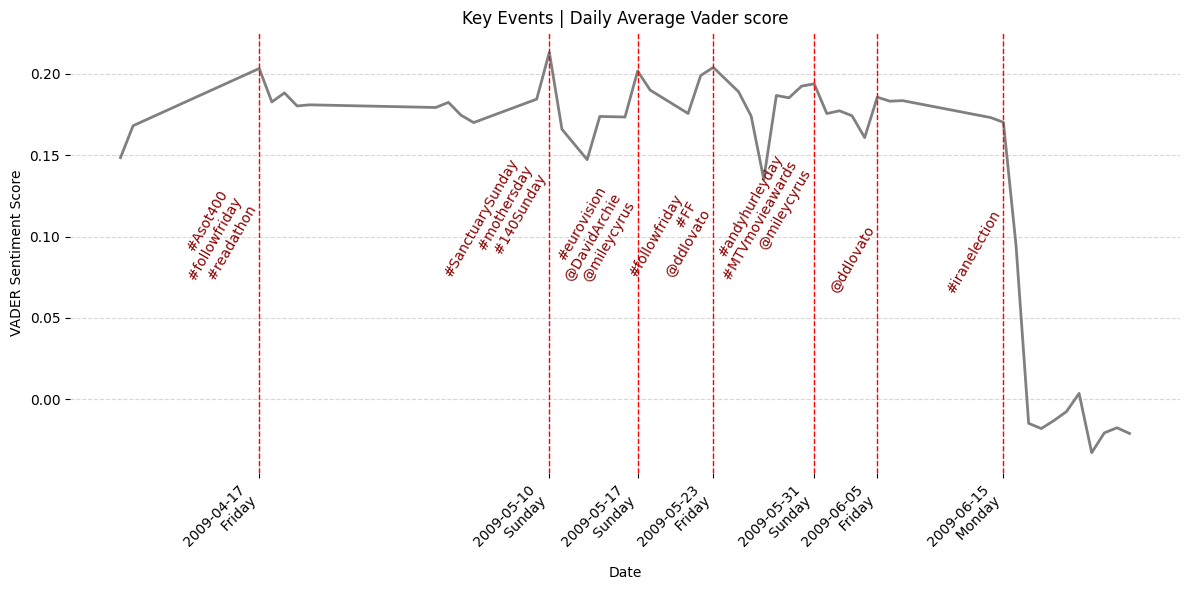

In [84]:
# Formatting date index correctly
sentiment_average.index = pd.to_datetime(sentiment_average.index)

# Figure size:
plt.figure(figsize=(12, 6)) 

# Plotting
sentiment_average.plot(kind='line', color='gray', linewidth=2)  # Using a line plot

# Key dates and corresponding labels:
events = {
    'Positive 17/04/2009': ('2009-04-17\n Friday', '#Asot400\n #followfriday\n #readathon'),
    'Positive 10/05/2009': ('2009-05-10\n Sunday', '#SanctuarySunday\n #mothersday\n #140Sunday'),
    'Positive 17/05/2009': ('2009-05-17\n Sunday', '#eurovision\n @DavidArchie\n @mileycyrus'),
    'Positive 23/05/2009': ('2009-05-23\n Friday', '#followfriday\n #FF\n @ddlovato'),
    'Positive 31/05/2009': ('2009-05-31\n Sunday', '#andyhurleyday\n #MTVmovieawards\n @mileycyrus'),
    'Positive 05/06/2009': ('2009-06-05\n Friday', '@ddlovato'),
    'Negative 15/06/2009': ('2009-06-15\n Monday', '#iranelection')
}
    
# Adding vertical lines for key events:
custom_xticks = []
custom_xlabels = []

for event, (date, label) in events.items():
    date_time = pd.to_datetime(date)
    plt.axvline(date_time, color='red', linestyle='--', linewidth=1)
    custom_xticks.append(date_time)
    custom_xlabels.append(date)
    if label:  # Only add text if there's a label associated with the event
        plt.text(date_time, sentiment_average.max() * 0.30, label, rotation=60, verticalalignment='bottom', horizontalalignment='right', color='darkred')

# Setting custom x-ticks and labels only for event dates
plt.xticks(custom_xticks, custom_xlabels, rotation=45)


# Customizing the plot to be clear and minimalistic
plt.title('Key Events | Daily Average Vader score')
plt.xlabel('Date')
plt.ylabel('VADER Sentiment Score')
plt.grid(True, linestyle='--', alpha=0.5)  # Adding light grid for easier reading of values
plt.box(False)  # Remove the box frame around the plot
plt.tight_layout()  # Adjust layout to not cut off labels

# Display the plot
plt.show()


## 3.1.4. NN for Sentiment Classification
## Labelling the scores

In [85]:
# Function to label the sentiment based on vader_score
def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the DataFrame
df['sentiment'] = df['vader_score'].apply(label_sentiment)

# Display the updated DataFrame
df

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

               day  vader_score day_of_week  \
0       2009-04-06      -0.7269      Monday   
1       2009-04-06       0.4939      Monday   
2       2009-04-06      -0.2500      Monday   
3       2009-04-06      -0.4939      Monday   
4       2009-04-06       0.0000      Monday   
...            ...          ...         ...   
1598309 2009-06-25       0.2755    Thursday   
1598310 2009-06-25       0.0000    Thursday   
1598311 2009-06-25       0.3612    Thursday   
1598312 2009-06-25       0.1027    Thursday   
1598313 2009-06-25       0.1531    Thursday   

                                                     tweet sentiment  
0        is upset that he can't update his Facebook by ...  Negative  
1        @Kenichan I dived many times for the ball. Man...  Positive  
2          my whole body feels itchy and like its on fire   Negative  
3        @nationwideclass no, it's not behaving at all....  Negative  
4                            @Kwesidei not the whole crew    Neutral  
...                                                    ...       ...  
1598309  Tried to get the mutant Fawkes to follow me bu...  Positive  
1598310                                    Gmail is down?    Neutral  
1598311  @Eric_Urbane Sounds like a rival is flagging y...  Positive  
1598312                      rest in peace Farrah! So sad   Positive  
1598313  has to resit exams over summer...  wishes he w...  Positive  

[1598314 rows x 10 columns]

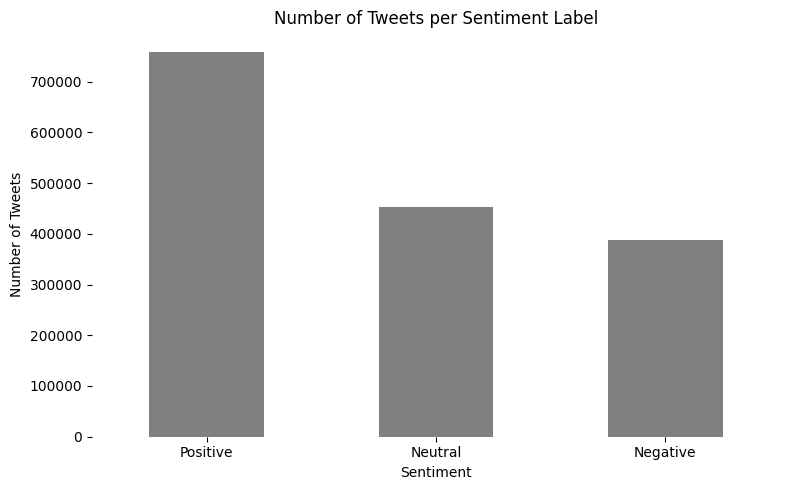

In [86]:
# Count the number of tweets per sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Plotting in Tufte style
plt.figure(figsize=(8, 5))  # Set the size of the figure
sentiment_counts.plot(kind='bar', color='gray')  # Use a plain color for the bars
plt.title('Number of Tweets per Sentiment Label')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)  # Keep the x labels horizontal for better readability
plt.grid(False)  # Remove grid lines for a cleaner look
plt.box(False)  # Remove the box frame around the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [148]:
sentiment_counts

Positive    759166
Neutral     452000
Negative    387148
Name: sentiment, dtype: int64


In [87]:
df

ids    tweet_id                date      flag           user  \
0              1  1467810672 2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1              2  1467810917 2009-04-06 22:19:53  NO_QUERY       mattycus   
2              3  1467811184 2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3              4  1467811193 2009-04-06 22:19:57  NO_QUERY         Karoli   
4              5  1467811372 2009-04-06 22:20:00  NO_QUERY       joy_wolf   
...          ...         ...                 ...       ...            ...   
1598309  1598310  2329204987 2009-06-25 10:28:28  NO_QUERY      360cookie   
1598310  1598311  2329205038 2009-06-25 10:28:28  NO_QUERY        bigenya   
1598311  1598312  2329205574 2009-06-25 10:28:30  NO_QUERY   davidlmulder   
1598312  1598313  2329205473 2009-06-25 10:28:30  NO_QUERY       LeeLHoke   
1598313  1598314  2329205794 2009-06-25 10:28:31  NO_QUERY     tpchandler   

               day  vader_score day_of_week  \
0       2009-04-06      -0.7269      Monday   
1       2009-04-06       0.4939      Monday   
2       2009-04-06      -0.2500      Monday   
3       2009-04-06      -0.4939      Monday   
4       2009-04-06       0.0000      Monday   
...            ...          ...         ...   
1598309 2009-06-25       0.2755    Thursday   
1598310 2009-06-25       0.0000    Thursday   
1598311 2009-06-25       0.3612    Thursday   
1598312 2009-06-25       0.1027    Thursday   
1598313 2009-06-25       0.1531    Thursday   

                                                     tweet sentiment  
0        is upset that he can't update his Facebook by ...  Negative  
1        @Kenichan I dived many times for the ball. Man...  Positive  
2          my whole body feels itchy and like its on fire   Negative  
3        @nationwideclass no, it's not behaving at all....  Negative  
4                            @Kwesidei not the whole crew    Neutral  
...                                                    ...       ...  
1598309  Tried to get the mutant Fawkes to follow me bu...  Positive  
1598310                                    Gmail is down?    Neutral  
1598311  @Eric_Urbane Sounds like a rival is flagging y...  Positive  
1598312                      rest in peace Farrah! So sad   Positive  
1598313  has to resit exams over summer...  wishes he w...  Positive  

[1598314 rows x 10 columns]

In [97]:
dfnn = df.copy()

In [98]:
#dfnn = dfnn[['sentiment','vader_score','word_count', 'character_count']]
dfnn = dfnn[['sentiment','vader_score']]

In [99]:
# Encoding "sentiment" 
encoder = LabelEncoder()
dfnn['sentiment'] = encoder.fit_transform(dfnn['sentiment'])  # Negative = 0, Neutral = 1 and Positive = 2

In [100]:
dfnn

sentiment  vader_score
0                0      -0.7269
1                2       0.4939
2                0      -0.2500
3                0      -0.4939
4                1       0.0000
...            ...          ...
1598309          2       0.2755
1598310          1       0.0000
1598311          2       0.3612
1598312          2       0.1027
1598313          2       0.1531

[1598314 rows x 2 columns]

In [101]:
X = dfnn.iloc[:,1:] # selecting all columns except sentiment| Dependent variables
y = dfnn.iloc[:,0] # selecting sentiment as our target variable | Independent variable

In [102]:
y

0          0
1          2
2          0
3          0
4          1
          ..
1598309    2
1598310    1
1598311    2
1598312    2
1598313    2
Name: sentiment, Length: 1598314, dtype: int32

In [105]:
y = to_categorical(y)
y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [110]:
# Scaling
scaler = StandardScaler()   # Standardizing features by removing the mand and scaling to unit variance.
X = scaler.fit_transform(X) # Appliying the scaler to the dataset, normal distribution properties, x̄ = 0 and σ = 1.

In [111]:
y.shape

(1598314, 3)

In [113]:
X.shape

(1598314, 1)

In [138]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# Building the model
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))  # First layer, 12 neurons and one feature.
model.add(Dense(8, activation='relu'))                # Second layer, 8 neurons.
model.add(Dense(3, activation='softmax'))             # Output layer, classification model it outputs 0, 1, or 2.

In [140]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=512, verbose=2)

Epoch 1/10
2498/2498 - 4s - loss: 0.1233 - accuracy: 0.9800 - val_loss: 0.0081 - val_accuracy: 0.9997 - 4s/epoch - 1ms/step
Epoch 2/10
2498/2498 - 3s - loss: 0.0041 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9995 - 3s/epoch - 1ms/step
Epoch 3/10
2498/2498 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0016 - val_accuracy: 0.9995 - 3s/epoch - 1ms/step
Epoch 4/10
2498/2498 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0013 - val_accuracy: 0.9996 - 3s/epoch - 1ms/step
Epoch 5/10
2498/2498 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9996 - 3s/epoch - 1ms/step
Epoch 6/10
2498/2498 - 3s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9997 - 3s/epoch - 1ms/step
Epoch 7/10
2498/2498 - 3s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0011 - val_accuracy: 0.9997 - 3s/epoch - 1ms/step
Epoch 8/10
2498/2498 - 3s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 9.0087e-04 - val_accuracy: 0.9997 - 3s/epoch - 1ms/step
Epoc

In [144]:
# Predicting from the model
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Converting probabilities to class labels

# Since y_test is one-hot encoded, converting it to class labels as well
y_test_labels = np.argmax(y_test, axis=1)

# Generating classification report
print(classification_report(y_test_labels, y_pred))

9990/9990 [==============================] - 8s 775us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77234
           1       1.00      1.00      1.00     90257
           2       1.00      1.00      1.00    152172

    accuracy                           1.00    319663
   macro avg       1.00      1.00      1.00    319663
weighted avg       1.00      1.00      1.00    319663



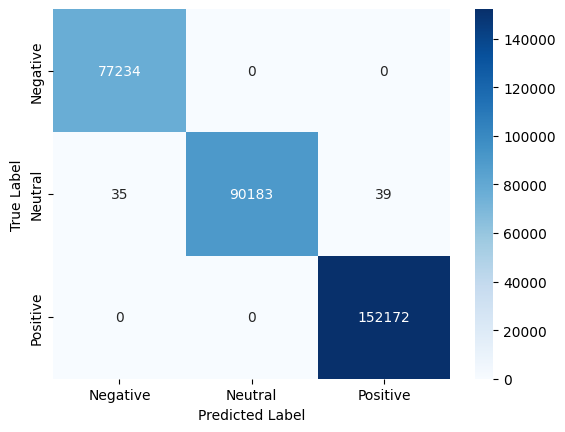

In [145]:
# Confusion matrix


y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


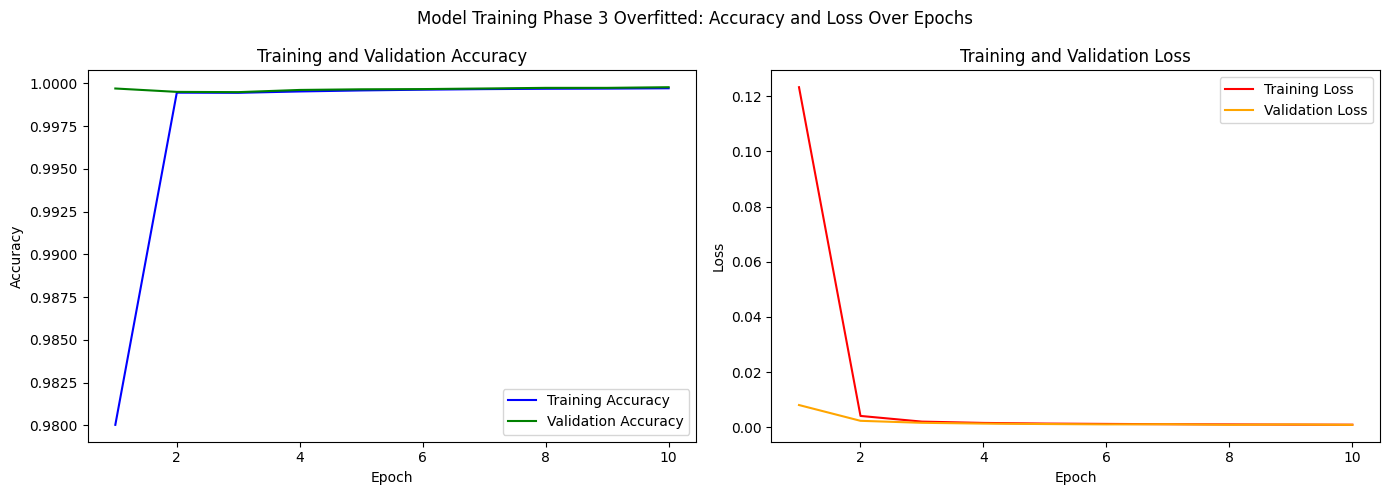

In [146]:
# Converting history into a DataFrame
history_df = pd.DataFrame(history.history)

# Extracting epochs
epochs_range = np.array(range(1, len(history_df) + 1))


# Plot Training and Validation Accuracy
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_df['accuracy'].values, label='Training Accuracy', color='blue')
plt.plot(epochs_range, history_df['val_accuracy'].values, label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_df['loss'].values, label='Training Loss', color='red')
plt.plot(epochs_range, history_df['val_loss'].values, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Training Phase 3 Overfitted: Accuracy and Loss Over Epochs")
plt.tight_layout()
plt.show()

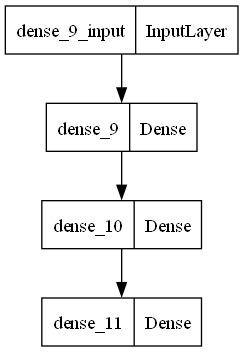

In [152]:
# CNN Architecture for Class Classification:

plot_model(model, to_file='model.png')